<a href="https://colab.research.google.com/github/Gayavi/Machine-Learning/blob/main/Using_A_Machine_Learning_Model_For_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The blog for the notebook will be available at https://medium.com/@gayavisandeepi/using-a-machine-learning-model-for-predictions-81d1d3242498


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/data/weatherHistory.csv')
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Handle null values and duplicates**

In [ ]:
df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [ ]:
df.isnull().sum()/len(df.index)

Formatted Date              0.00000
Summary                     0.00000
Precip Type                 0.00536
Temperature (C)             0.00000
Apparent Temperature (C)    0.00000
Humidity                    0.00000
Wind Speed (km/h)           0.00000
Wind Bearing (degrees)      0.00000
Visibility (km)             0.00000
Loud Cover                  0.00000
Pressure (millibars)        0.00000
Daily Summary               0.00000
dtype: float64

In [ ]:
df2 = df.copy()
df2= df2.dropna()
df2.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [ ]:
print(df2.duplicated().value_counts())

False    95912
True        24
dtype: int64


In [ ]:
df2=df2.drop_duplicates()
print(df2.duplicated().value_counts())

False    95912
dtype: int64


**Handle outliers**

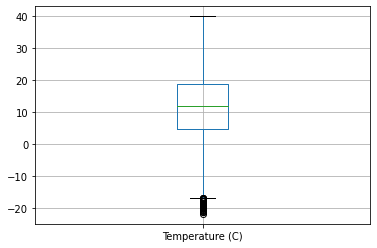

In [ ]:
df2.boxplot(column=['Temperature (C)'])

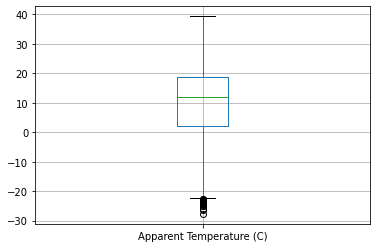

In [ ]:
df2.boxplot(column=['Apparent Temperature (C)'])

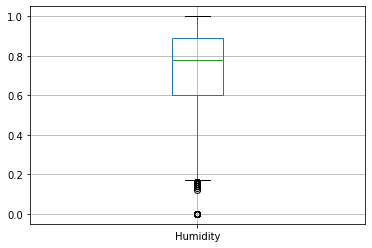

In [ ]:
df2.boxplot(column=['Humidity'])

In [ ]:
df3=df2.drop(df2[df2['Humidity'] < 0.01].index)

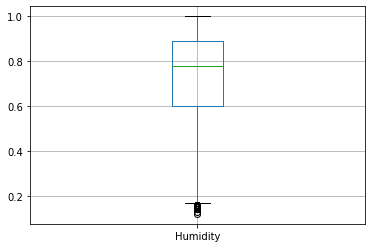

In [ ]:
df3.boxplot(column=['Humidity'])

In [ ]:
print("Before Shape:",df2.shape)
print("After Shape:",df3.shape)

Before Shape: (95912, 12)
After Shape: (95890, 12)


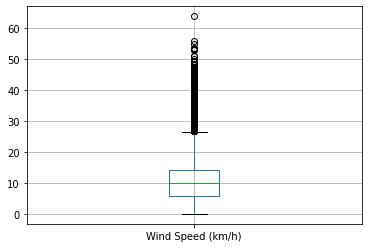

In [ ]:
df2.boxplot(column=['Wind Speed (km/h)'])

In [ ]:
df2['Wind Speed (km/h)'].value_counts()

3.2200     2440
11.2700    1492
6.4400     1354
0.0000     1296
8.0500      920
           ... 
35.0336       1
33.5846       1
35.6776       1
41.5541       1
37.2715       1
Name: Wind Speed (km/h), Length: 2484, dtype: int64

In [ ]:
df3=df2.drop(df2[df2['Wind Speed (km/h)'] > 60].index)

In [ ]:
print("Before Shape:",df2.shape)
print("After Shape:",df3.shape)

Before Shape: (95912, 12)
After Shape: (95911, 12)


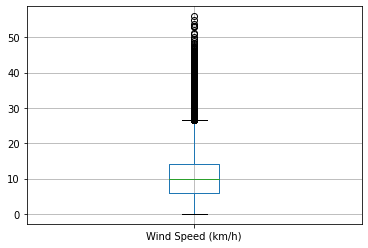

In [ ]:
df3.boxplot(column=['Wind Speed (km/h)'])

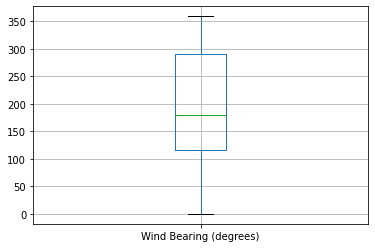

In [ ]:
df2.boxplot(column=['Wind Bearing (degrees)'])

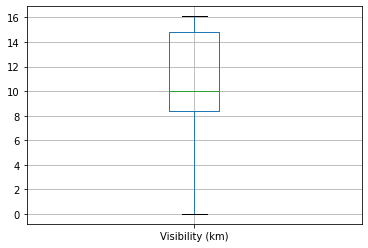

In [ ]:
df2.boxplot(column=['Visibility (km)'])

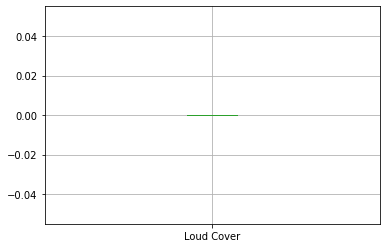

In [ ]:
df2.boxplot(column=['Loud Cover'])

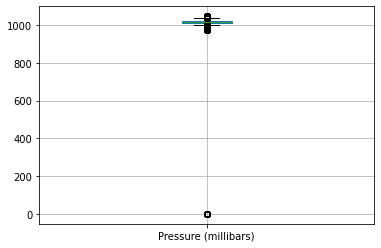

In [ ]:
df2.boxplot(column=['Pressure (millibars)'])

In [ ]:
df3=df2.drop(df2[df2['Pressure (millibars)'] < 200].index)
print("Before Shape:",df2.shape)
print("After Shape:",df3.shape)

Before Shape: (95912, 12)
After Shape: (94624, 12)


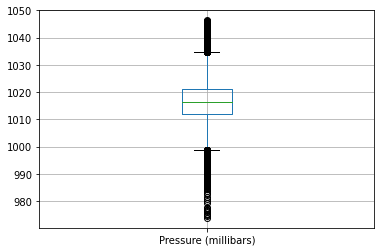

In [ ]:
df3.boxplot(column=['Pressure (millibars)'])

In [ ]:
df3=df3.drop(['Formatted Date','Daily Summary','Loud Cover'],axis=1)

In [ ]:
y=df3['Apparent Temperature (C)']
df3=df3.drop(['Apparent Temperature (C)'],axis=1)
df3.head(10)

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
5,Partly Cloudy,rain,9.222222,0.85,13.9587,258.0,14.9569,1016.66
6,Partly Cloudy,rain,7.733333,0.95,12.3648,259.0,9.9820,1016.72
7,Partly Cloudy,rain,8.772222,0.89,14.1519,260.0,9.9820,1016.84
8,Partly Cloudy,rain,10.822222,0.82,11.3183,259.0,9.9820,1017.37
9,Partly Cloudy,rain,13.772222,0.72,12.5258,279.0,9.9820,1017.22


**Encoding for categorical data**

In [ ]:
df3['Precip Type']=df3['Precip Type'].astype('category')
df3['Precip Type']=df3['Precip Type'].cat.codes
df3['Precip Type'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Precip Type, dtype: int8

In [ ]:
df3['Summary']=df3['Summary'].astype('category')
df3['Summary']=df3['Summary'].cat.codes
df3['Summary'].head(10)

0    19
1    19
2    17
3    19
4    17
5    19
6    19
7    19
8    19
9    19
Name: Summary, dtype: int8

**Spliting the dataset**

In [ ]:
X_training, X_testing, y_train, y_test = train_test_split(df3, y, test_size=0.2)
X_train=X_training.copy()
X_test=X_testing.copy()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(75699, 8) (75699,)
(18925, 8) (18925,)


In [ ]:
X_train.head(10)
X_test.head(10)

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
13631,18,0,17.605556,0.60,13.1859,280.0,15.0052,1009.57
48360,19,0,16.505556,0.88,6.2790,349.0,15.8263,1016.75
80523,12,1,-1.088889,0.92,8.1949,81.0,1.9642,1029.91
48887,19,0,23.222222,0.61,15.8585,130.0,11.9301,1007.85
58383,19,0,3.055556,0.41,22.3307,50.0,10.3684,1025.71
52261,19,0,23.844444,0.35,16.9211,309.0,9.9820,1016.81
38709,18,0,7.594444,0.89,11.1090,127.0,7.6958,1003.26
94368,19,0,2.877778,0.93,9.3219,149.0,6.2951,1019.10
76270,19,0,11.700000,0.93,2.8336,59.0,14.3612,1017.17
33706,17,0,15.000000,0.83,16.4059,141.0,10.7065,1005.95


# **Transformations for Training data**

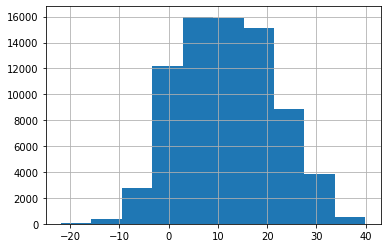

In [ ]:
X_train['Temperature (C)'].hist()

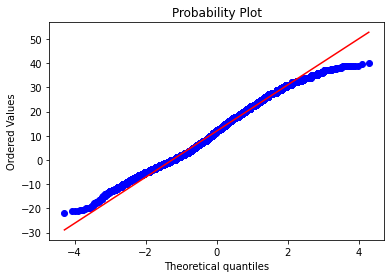

In [ ]:
stats.probplot(X_train["Temperature (C)"], dist="norm", plot=plt)
plt.show()

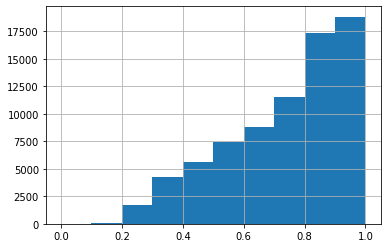

In [ ]:
X_train['Humidity'].hist()

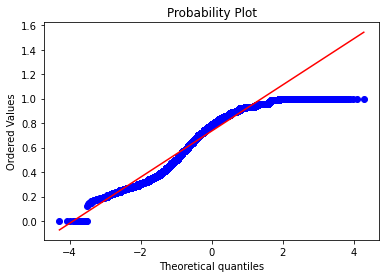

In [ ]:
stats.probplot(X_train["Humidity"], dist="norm", plot=plt)
plt.show()

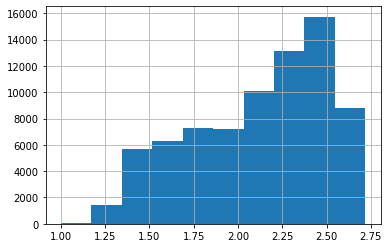

In [ ]:
exponential_transformer = FunctionTransformer(np.exp)
data_new = exponential_transformer.transform(X_train['Humidity'])
X_train['Humidity'] = data_new
X_train['Humidity'].hist()        

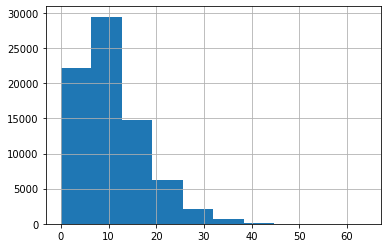

In [ ]:
X_train['Wind Speed (km/h)'].hist()

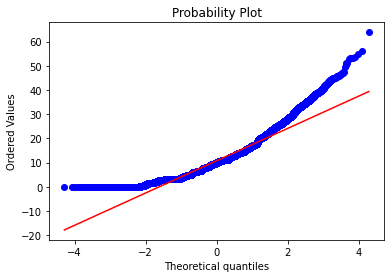

In [ ]:
stats.probplot(X_train["Wind Speed (km/h)"], dist="norm", plot=plt)
plt.show()

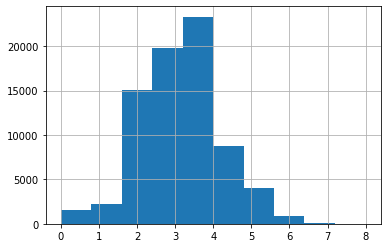

In [ ]:
logarithm_transformer = FunctionTransformer(np.sqrt)

new_wind= logarithm_transformer.transform(X_train['Wind Speed (km/h)'])
X_train['Wind Speed (km/h)']=new_wind
X_train['Wind Speed (km/h)'].hist()

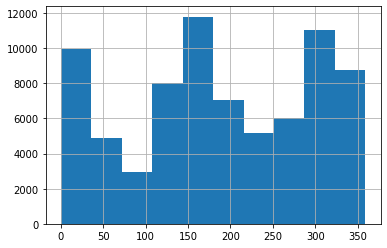

In [ ]:
X_train['Wind Bearing (degrees)'].hist()

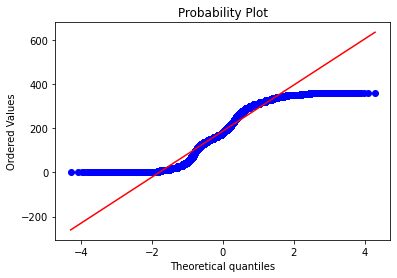

In [ ]:
stats.probplot(X_train["Wind Bearing (degrees)"], dist="norm", plot=plt)
plt.show()

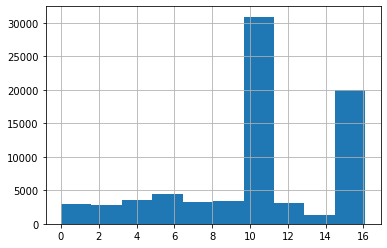

In [ ]:
X_train['Visibility (km)'].hist()

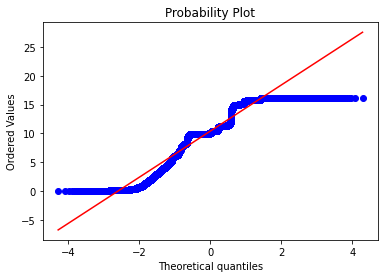

In [ ]:
stats.probplot(X_train["Visibility (km)"], dist="norm", plot=plt)
plt.show()

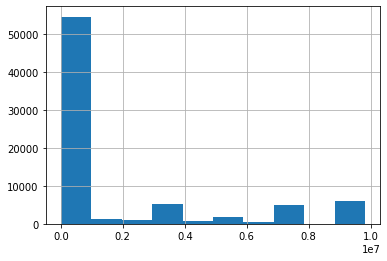

In [ ]:
new_visi = exponential_transformer.transform(X_train['Visibility (km)'])
X_train['Visibility (km)'] = new_visi
X_train['Visibility (km)'].hist()  

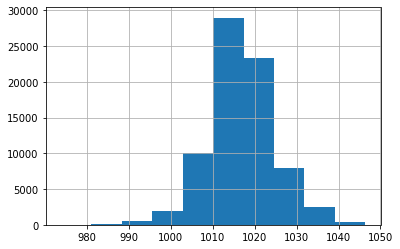

In [ ]:
X_train['Pressure (millibars)'].hist()

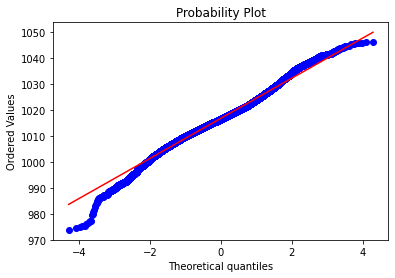

In [ ]:
stats.probplot(X_train["Pressure (millibars)"], dist="norm", plot=plt)
plt.show()

## **Transformations for Test data**

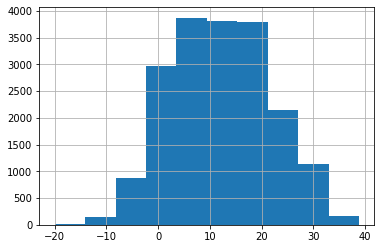

In [ ]:
X_test['Temperature (C)'].hist()

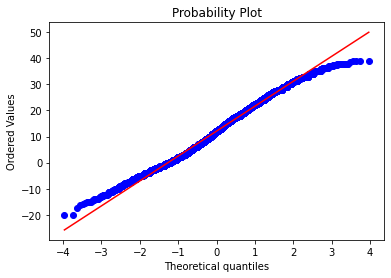

In [ ]:
stats.probplot(X_test["Temperature (C)"], dist="norm", plot=plt)
plt.show()

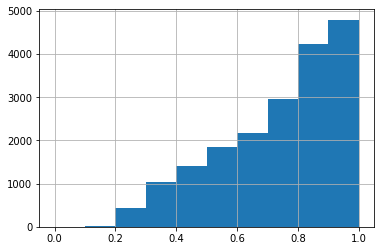

In [ ]:
X_test['Humidity'].hist()

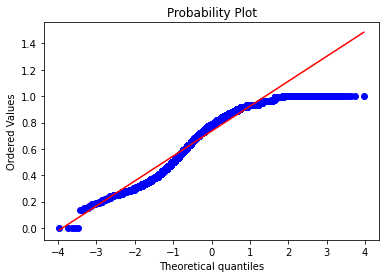

In [ ]:
stats.probplot(X_test["Humidity"], dist="norm", plot=plt)
plt.show()

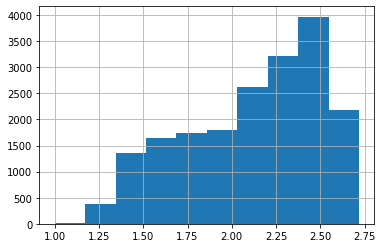

In [ ]:
exponential_transformer = FunctionTransformer(np.exp)
humidity= exponential_transformer.transform(X_test['Humidity'])
X_test['Humidity'] = humidity
X_test['Humidity'].hist()      

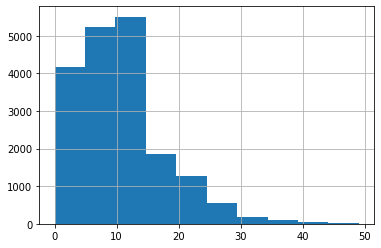

In [ ]:
X_test['Wind Speed (km/h)'].hist()

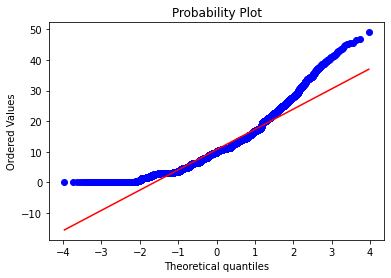

In [ ]:
stats.probplot(X_test["Wind Speed (km/h)"], dist="norm", plot=plt)
plt.show()

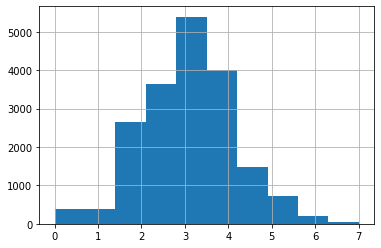

In [ ]:
logarithm_transformer = FunctionTransformer(np.sqrt)
wind= logarithm_transformer.transform(X_test['Wind Speed (km/h)'])
X_test['Wind Speed (km/h)']=wind
X_test['Wind Speed (km/h)'].hist()

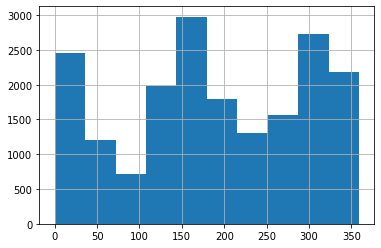

In [ ]:
X_test['Wind Bearing (degrees)'].hist()

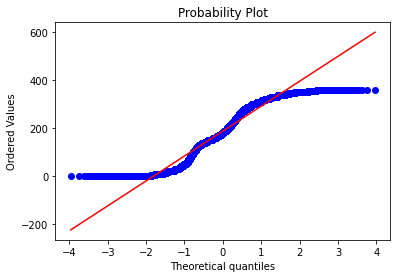

In [ ]:
stats.probplot(X_test["Wind Bearing (degrees)"], dist="norm", plot=plt)
plt.show()

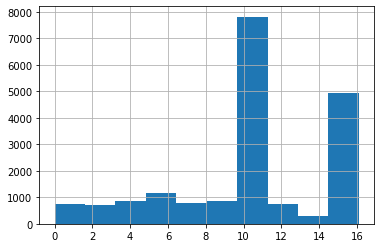

In [ ]:
X_test['Visibility (km)'].hist()

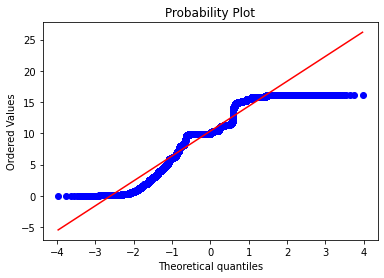

In [ ]:
stats.probplot(X_test["Visibility (km)"], dist="norm", plot=plt)
plt.show()

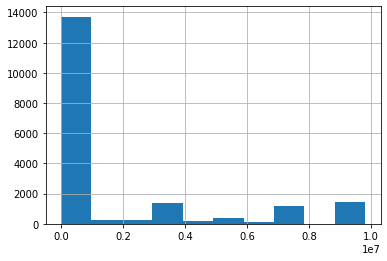

In [ ]:
visi = exponential_transformer.transform(X_test['Visibility (km)'])
X_test['Visibility (km)'] = visi
X_test['Visibility (km)'].hist() 

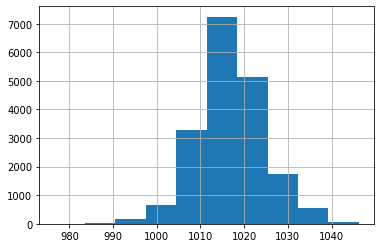

In [ ]:
X_test['Pressure (millibars)'].hist()

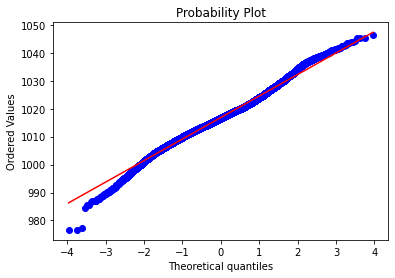

In [ ]:
stats.probplot(X_test["Pressure (millibars)"], dist="norm", plot=plt)
plt.show()

**Scaling**

In [ ]:
columnfeatures=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
scaler = StandardScaler() 

scaler.fit(X_train[columnfeatures])
X_train[columnfeatures]=scaler.transform(X_train[columnfeatures])
X_test[columnfeatures]=scaler.transform(X_test[columnfeatures])


**Correlation and significance matrix**

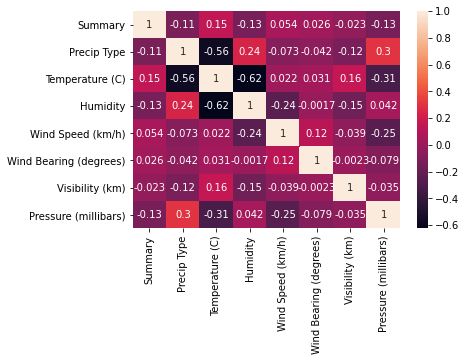

In [ ]:
sns.heatmap(X_train.corr(),annot = True);

                           Summary  ...  Apparent Temperature (C)
Summary                   1.000000  ...                  0.140616
Precip Type              -0.114647  ...                 -0.565504
Temperature (C)           0.145901  ...                  0.992621
Humidity                 -0.125974  ...                 -0.595156
Wind Speed (km/h)         0.054238  ...                 -0.046021
Wind Bearing (degrees)    0.025582  ...                  0.029950
Visibility (km)          -0.023196  ...                  0.162365
Pressure (millibars)     -0.128240  ...                 -0.288093
Apparent Temperature (C)  0.140616  ...                  1.000000

[9 rows x 9 columns]


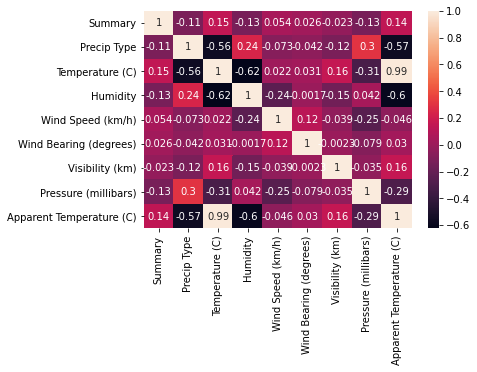

In [ ]:
d_data = X_train.copy()
d_data['Apparent Temperature (C)'] = y_train
d_data.head(10)
print(d_data.corr())
sns.heatmap(d_data.corr(),annot=True)

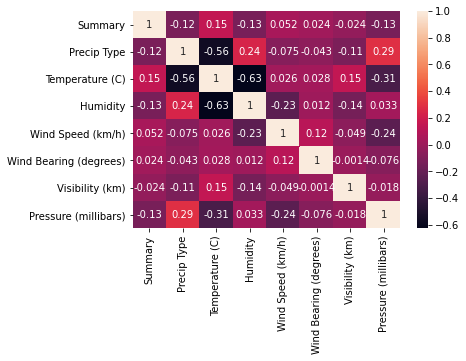

In [ ]:
sns.heatmap(X_test.corr(),annot = True);

                           Summary  ...  Apparent Temperature (C)
Summary                   1.000000  ...                  0.149086
Precip Type              -0.123991  ...                 -0.565099
Temperature (C)           0.152501  ...                  0.992798
Humidity                 -0.126898  ...                 -0.597939
Wind Speed (km/h)         0.052136  ...                 -0.041033
Wind Bearing (degrees)    0.023665  ...                  0.029357
Visibility (km)          -0.023880  ...                  0.153006
Pressure (millibars)     -0.128611  ...                 -0.288617
Apparent Temperature (C)  0.149086  ...                  1.000000

[9 rows x 9 columns]


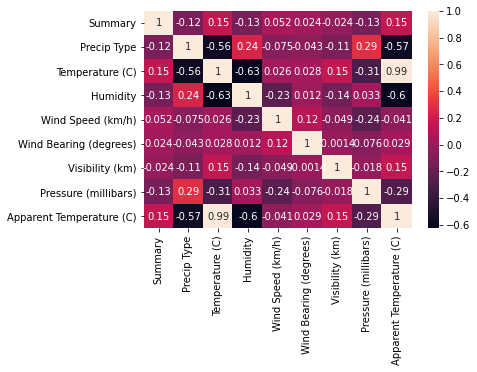

In [ ]:
t_data = X_test.copy()
t_data['Apparent Temperature (C)'] = y_test
t_data.head(10)
print(t_data.corr())
sns.heatmap(t_data.corr(),annot=True)

**PCA**

In [ ]:
pca = PCA(n_components=7)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.75229205, 0.07473379, 0.04946061, 0.03909931, 0.03695912,
       0.03427559, 0.01070326])

**Applying Linear Regression and predictions**

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train_pca, y_train)
y_hat = lm.predict(X_test_pca)

**Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

1.3419868288749057

In [ ]:
print(lm.score(X_test_pca,y_test))

0.9882800742814732


In [ ]:
print(lm.coef_)

[-0.38933596  6.29172755 -2.8197576  -0.33365444  0.24949402 -4.61087873
 -6.47714016]


In [ ]:
print(lm.intercept_)

10.84783139656916


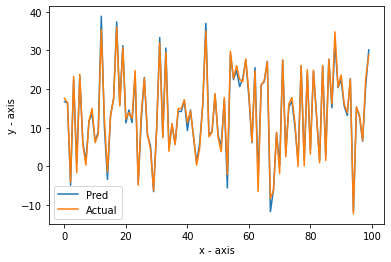

In [ ]:
finaldataframe =pd.DataFrame({'actual':y_test,'prediction':y_hat})
finaldataframe2=finaldataframe.reset_index(drop=True)
plt.plot(finaldataframe2['prediction'][:100], label = "Pred")
plt.plot(finaldataframe2['actual'][:100], label = "Actual")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.legend()
plt.show()

In [ ]:
scores = cross_val_score(model,X_train, y_train, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.99008823 0.99012538 0.99040634 0.99034704 0.99026689 0.99013622]


In [ ]:
predictions = cross_val_predict(model,X_train, y_train, cv=6)
accuracy = metrics.r2_score(y_train, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9902295002830449


## **Thank you**

---


